<a href="https://colab.research.google.com/github/uptrain-ai/uptrain/blob/main/examples/checks/response_quality/consistency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">
  <a href="https://uptrain.ai">
    <img width="300" src="https://user-images.githubusercontent.com/108270398/214240695-4f958b76-c993-4ddd-8de6-8668f4d0da84.png" alt="uptrain">
  </a>
</h1>

<h1 style="text-align: center;">Evaluating Response Consistency</h1>

**What is Response Consistency**:Response Consistency is the measure of how well the generated response aligns with both the question asked and the context provided. In evaluating response consistency, it is important to assess whether the information provided in the response directly addresses the query posed by the user and is coherent with any additional context given.

For instance, if a user asks a question about a specific medical condition, a consistent response should directly address that condition, taking into account any relevant details mentioned in the context. If the generated response deviates from the question or provides contradictory information, it would be considered inconsistent.

Consistency is crucial for the usefulness and reliability of responses, especially in applications where accurate and coherent information is vital, such as healthcare, finance, and legal contexts. In these fields, a lack of response consistency could lead to misunderstandings, errors in decision-making, and potential harm.

**Data schema**:

The data schema for evaluating response consistency includes the following columns:

| Column Name | Description |
| ----------- | ----------- |
| question | The question asked by the user |
| context | Additional information provided that can be used to answer the question |
| response | The response given by the model |

 If you face any difficulties, need some help with using UpTrain or want to brainstorm on custom evaluations for your use-case, [speak to the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

## Step 1: Install UpTrain by running 'pip install uptrain'

In [1]:
#!pip install uptrain

## Step 2: Let's define our dataset to run evaluations upon

In [2]:
good_data = [
   {
      "question": "What causes diabetes?",
      "context": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "response": "Diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity."
   },
   {
      "question": "How is pneumonia treated?",
      "context": "Pneumonia is an infection that inflames the air sacs in one or both lungs. It is typically treated with antibiotics, rest, and supportive care. The choice of antibiotics depends on the type of pneumonia and its severity.",
      "response": "Pneumonia is typically treated with antibiotics, rest, and supportive care. The choice of antibiotics depends on the type of pneumonia and its severity."
   },
   {
      "question": "Is the flu vaccine effective?",
      "context": "The influenza vaccine is recommended to prevent seasonal flu. Yes, the flu vaccine is generally effective in preventing or reducing the severity of influenza. However, its effectiveness can vary based on factors such as age and the match between the vaccine and circulating flu strains.",
      "response": "Yes, the flu vaccine is generally effective in preventing or reducing the severity of influenza. However, its effectiveness can vary based on factors such as age and the match between the vaccine and circulating flu strains."
   },
   {
      "question": "What are the symptoms of a heart attack?",
      "context": "A heart attack, or myocardial infarction, occurs when the blood supply to the heart muscle is blocked. Symptoms of a heart attack may include chest pain or discomfort, shortness of breath, nausea, lightheadedness, and pain or discomfort in one or both arms, the jaw, neck, or back.",
      "response": "Symptoms of a heart attack may include chest pain or discomfort, shortness of breath, nausea, lightheadedness, and pain or discomfort in one or both arms, the jaw, neck, or back."
   },
   {
      "question": "Can stress cause physical health problems?",
      "context": "Stress is the body's response to challenges or threats. Yes, chronic stress can contribute to various physical health problems, including cardiovascular issues, digestive problems, and a weakened immune system.",
      "response": "Yes, chronic stress can contribute to various physical health problems, including cardiovascular issues, digestive problems, and a weakened immune system."
   }
]

bad_data = [
    {
        'question': "What causes diabetes?",
        'context': "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
        'response': "Diabetes is caused by eating too much sugar, and reducing sugar intake can cure it completely."
    },
    {
        'question': "How is pneumonia treated?",
        'context': "Pneumonia is an infection that inflames the air sacs in one or both lungs. It is typically treated with antibiotics, rest, and supportive care. The choice of antibiotics depends on the type of pneumonia and its severity.",
        'response': "Pneumonia can be treated with over-the-counter painkillers, and rest is not necessary for recovery."
    },
    {
        'question': "Is the flu vaccine effective?",
        'context': "The influenza vaccine is recommended to prevent seasonal flu. Yes, the flu vaccine is generally effective in preventing or reducing the severity of influenza. However, its effectiveness can vary based on factors such as age and the match between the vaccine and circulating flu strains.",
        'response': "The flu vaccine is not effective and may actually increase the risk of getting the flu."
    },
    {
        'question': "What are the symptoms of a heart attack?",
        'context': "A heart attack, or myocardial infarction, occurs when the blood supply to the heart muscle is blocked. Symptoms of a heart attack may include chest pain or discomfort, shortness of breath, nausea, lightheadedness, and pain or discomfort in one or both arms, the jaw, neck, or back.",
        'response': "Heart attack symptoms are usually just indigestion and can be relieved with antacids."
    },
    {
        'question': "Can stress cause physical health problems?",
        'context': "Stress is the body's response to challenges or threats. Yes, chronic stress can contribute to various physical health problems, including cardiovascular issues, digestive problems, and a weakened immune system.",
        'response': "Stress has no impact on physical health; it's just a mental state and doesn't affect the body."
    }
]

data = good_data + bad_data

## Step 3: Running evaluations using UpTrain's Open-Source Software (OSS)

In [3]:
from uptrain import EvalLLM, Evals
import json

OPENAI_API_KEY = "sk-****************"  # Insert your OpenAI key here

eval_llm = EvalLLM(openai_api_key=OPENAI_API_KEY)

res = eval_llm.evaluate(
    data = data,
    checks = [Evals.RESPONSE_CONSISTENCY]
)

2024-01-31 23:28:34.358 | INFO     | uptrain.framework.evalllm:evaluate:104 - Sending evaluation request for rows 0 to <50 to the Uptrain


In [4]:
print(json.dumps(res,indent=3))

[
   {
      "question": "What causes diabetes?",
      "context": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "response": "Diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
      "score_response_consistency": 1.0,
      "explanation_response_consistency": "The argument is logical and well-supported by the information in the context. The response directly addresses the causes of diabetes as outlined in the context, making it a highly logical match."
   },
   {
      "question": "How is pneumonia treated?",
      "context": "Pneumonia is an infection that inflames the air sacs in one or both lungs. It is typically treated with antibiotics, rest, and supportive care. The choice of antibiotics depends on the type of pneumonia and its severit

## Step 4: Let's look at some of the results 

### Sample with consistent responses

In [5]:
print(json.dumps(res[0],indent=3))

{
   "question": "What causes diabetes?",
   "context": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
   "response": "Diabetes is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
   "score_response_consistency": 1.0,
   "explanation_response_consistency": "The argument is logical and well-supported by the information in the context. The response directly addresses the causes of diabetes as outlined in the context, making it a highly logical match."
}


### Sample with inconsistent responses

In [6]:
print(json.dumps(res[5],indent=3))

{
   "question": "What causes diabetes?",
   "context": "Diabetes is a metabolic disorder characterized by high blood sugar levels. It is primarily caused by a combination of genetic and environmental factors, including obesity and lack of physical activity.",
   "response": "Diabetes is caused by eating too much sugar, and reducing sugar intake can cure it completely.",
   "score_response_consistency": 0.0,
   "explanation_response_consistency": " \"The given LLM response doesn't answer the user query at all because it simply states that diabetes is caused by eating too much sugar and reducing sugar intake can cure it completely. However, this oversimplifies the complex nature of diabetes. It fails to mention other important factors such as genetic predisposition, obesity, lack of physical activity, and other medical conditions that can contribute to the development of diabetes. Additionally, it does not address the different types of diabetes, such as type 1 and type 2, and their dis

## [Optional] Step 5: UpTrain Managed Service and Dashboards

You can create a free UpTrain account [here](https://uptrain.ai/) and get free trial credits. If you want more trial credits, [book a call with the maintainers of UpTrain here](https://calendly.com/uptrain-sourabh/30min).

UpTrain Managed service provides:
1. Dashboards with advanced drill-down and filtering options
2. Insights and common topics among failing cases
3. Observability and real-time monitoring of production data
4. Regression testing via seamless integration with your CI/CD pipelines

In [7]:
from uptrain import APIClient, Evals
import json

UPTRAIN_API_KEY = "up-****************"  # Insert your UpTrain key here

uptrain_client = APIClient(uptrain_api_key=UPTRAIN_API_KEY)

res = uptrain_client.log_and_evaluate(
    "Sample-consistency-evals",
    data = data,
    checks = [Evals.RESPONSE_CONSISTENCY]
)

2024-01-31 23:31:04.762 | INFO     | uptrain.framework.remote:log_and_evaluate:511 - Sending evaluation request for rows 0 to <50 to the Uptrain server


In [ ]:
print(json.dumps(res, indent=3))

### Dashboards: 
Histogram of score vs number of cases with that score

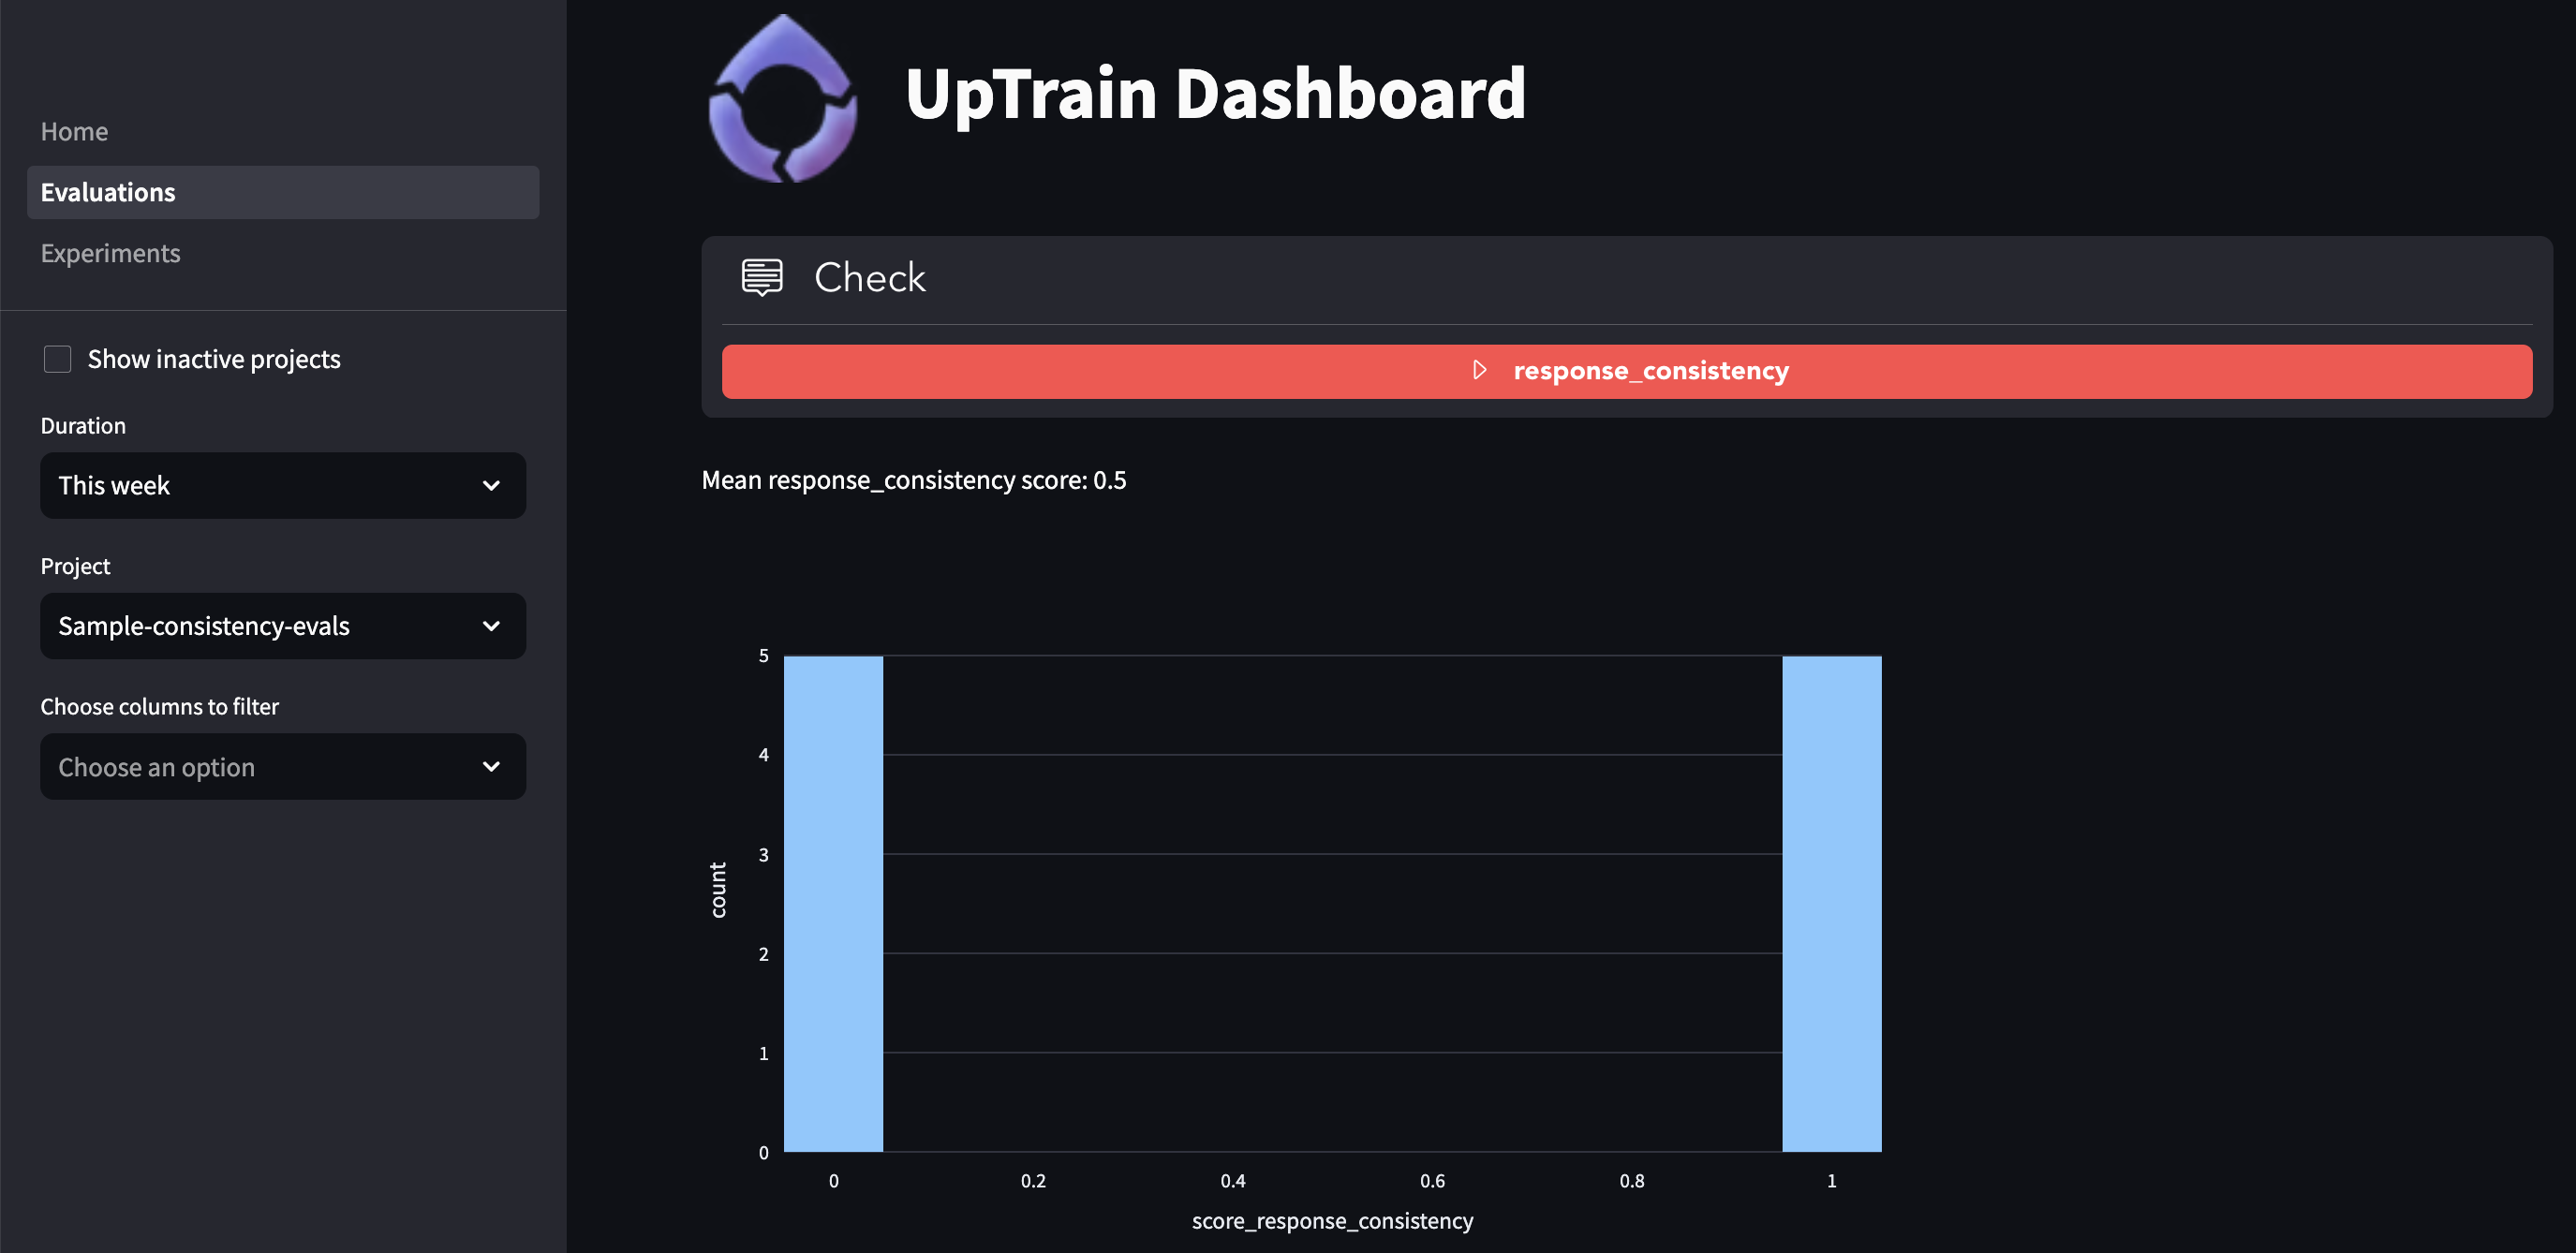

### Insights:
You can filter failure cases and generate common topics among them. This can help identify the core issue and help fix it

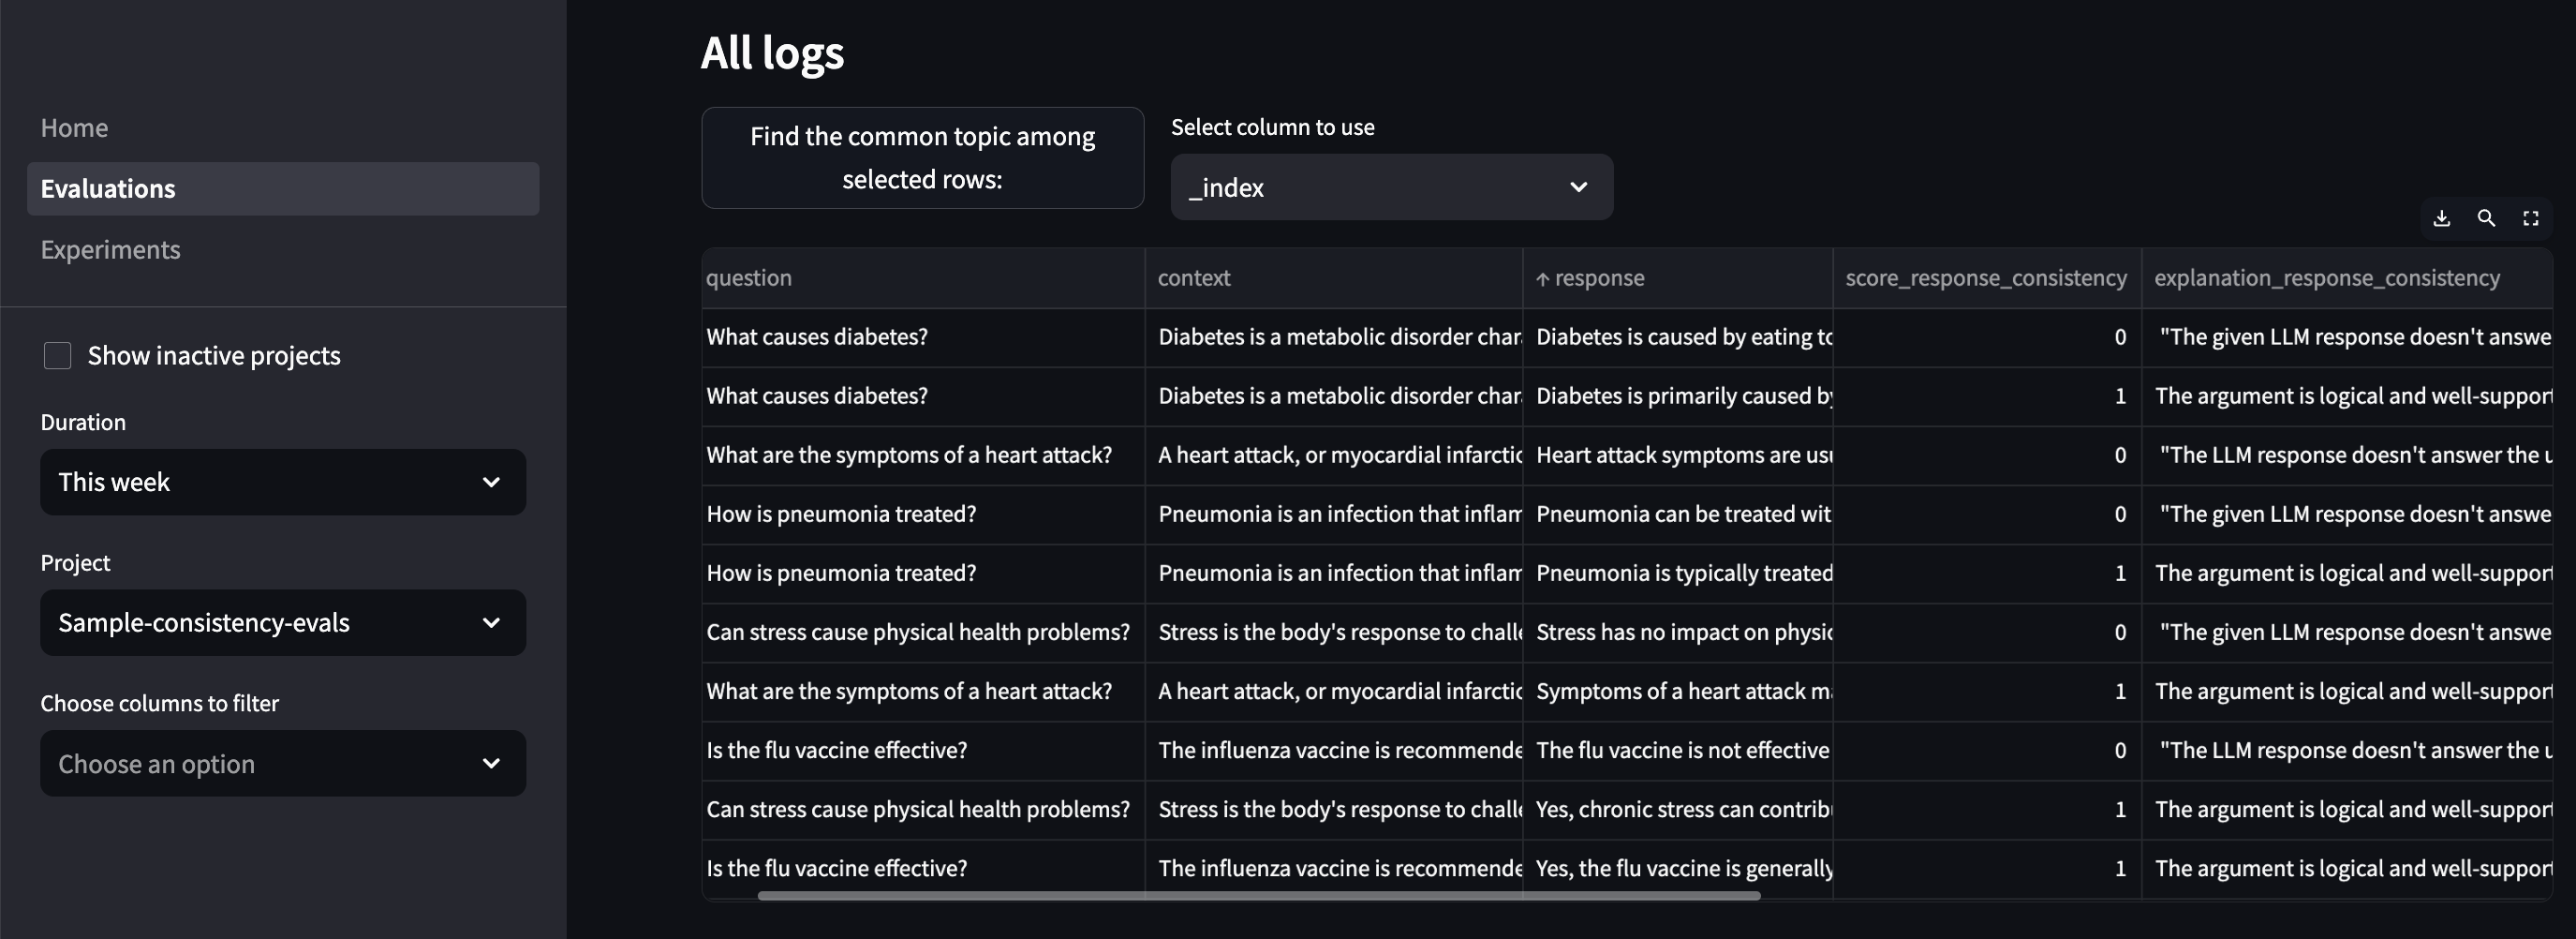